## data gotten from data.gov
https://catalog.data.gov/dataset/indicators-of-anxiety-or-depression-based-on-reported-frequency-of-symptoms-during-last-7-/resource/fd15ea5e-2966-480d-aaf3-30bb372f8ba3

Bryan Cortes

This is information gotten through surveys that was conducted during the pandemic surge of COVID-19. It was evaluated what the indicator shown from either anxiety, depression, or listed as either. Listed is also the state they preside (including the United States if not mentioned and the District of Columbia) and the group if given. The group can vary, they can be from the state, sex, age, by education, race/ethnicity. This can later be split into smaller subgroups from the group. For example by state -> California or age->30-39.

My main results can be found more towards the bottom after my quick inspection of all the confidence intervals of the states where I use a decision tree classifier to determine the indicators as mentioned above. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
my_file = pd.read_csv('C:/Datasets/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')

In [3]:
# my_file.head(50)

In [4]:
im = SimpleImputer(strategy = 'constant')
new_file = pd.DataFrame(im.fit_transform(my_file),columns=my_file.columns)

In [5]:
my_file.rename(columns={'Time Period Start Date':'Start Date','Time Period End Date':'End Date'},inplace=True)

In [6]:
my_file['Start Date'] = pd.to_datetime(my_file['Start Date'])
my_file['End Date'] = pd.to_datetime(my_file['End Date'])
my_file.drop(['Quartile Range'],axis=1,inplace=True)

In [7]:
my_file.head(50)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Start Date,End Date,Value,Low CI,High CI,Confidence Interval
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,18.4,17.0,19.7,17.0 - 19.7
6,Symptoms of Depressive Disorder,By Age,United States,70 - 79 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,13.6,11.8,15.5,11.8 - 15.5
7,Symptoms of Depressive Disorder,By Age,United States,80 years and above,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,14.4,9.0,21.4,9.0 - 21.4
8,Symptoms of Depressive Disorder,By Sex,United States,Male,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,20.8,19.6,22.0,19.6 - 22.0
9,Symptoms of Depressive Disorder,By Sex,United States,Female,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,26.1,25.2,27.1,25.2 - 27.1


In [8]:
my_file_TP = my_file.groupby(['Time Period'])[['Time Period','Time Period Label','Start Date','End Date','State','Group','Indicator','Value','Low CI','High CI','Confidence Interval']]

In [9]:
# my_file_TP.head(50)

In [10]:
# grouped by their state of origin including those stated in the United States (without specified state)
my_file_S = my_file.groupby(['State'])[['State','Value','Low CI','High CI','Time Period','Start Date','End Date']]

In [11]:
print(my_file.dtypes)

Indicator                      object
Group                          object
State                          object
Subgroup                       object
Phase                          object
Time Period                     int64
Time Period Label              object
Start Date             datetime64[ns]
End Date               datetime64[ns]
Value                         float64
Low CI                        float64
High CI                       float64
Confidence Interval            object
dtype: object


In [12]:
# my_file_S.head(50)

In [13]:
my_file_G = my_file.groupby(['Group'])[['Group','Value','Low CI','High CI','Time Period','Start Date','End Date']]

In [14]:
# my_file_G.head(50)

In [15]:
my_file_SG = my_file.groupby(['State','Group'])[['State','Group','Value','Low CI','High CI','Time Period','Start Date','End Date']]

In [16]:
 # my_file_SG.head(100)

In [17]:
# the overall average of each state that we see
avg_state = my_file.groupby('State')[['State','Value','Low CI','High CI']].mean().reset_index()

In [18]:
# avg_state

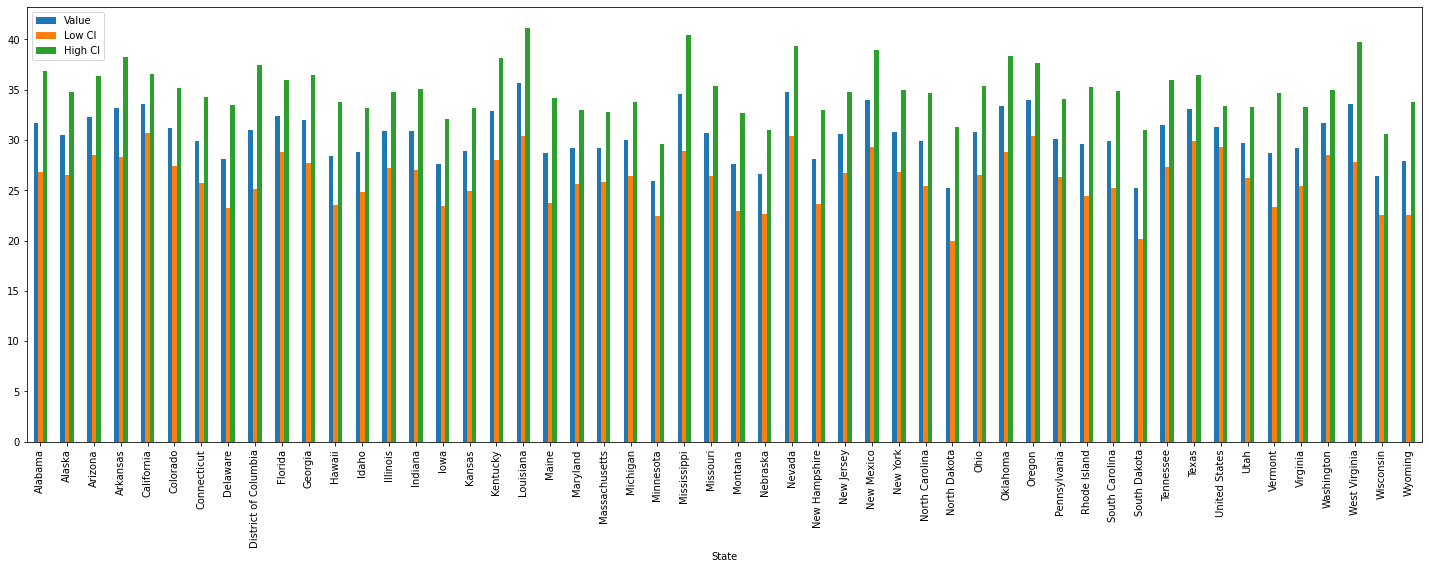

In [19]:
# demonstrate AVERAGE values corresponding to each state and those without a state are recorded under 'United States'
df = pd.DataFrame(avg_state,columns=['State','Value','Low CI','High CI'])
df.plot(x='State',y=['Value','Low CI','High CI'],kind="bar",figsize=(25,8))
plt.show()

In [20]:
# gives each unique state (including United States & District of Columbia)
# an unique number

# get corresponding numbers for the number of states
count = my_file['State'].value_counts()
item_mapping={}
item_list = count.index
for i in range(0,len(item_list)):
    item_mapping[item_list[i]]=i
    

# match the unique numbers with each corresponding state
my_file['State Number']=my_file['State'].map(lambda count:item_mapping[count])    

In [21]:
# give each 'Group' a specific number in correspondence
count = my_file['Group'].value_counts()
item_mapping={}
item_list = count.index
for i in range(0,len(item_list)):
    item_mapping[item_list[i]]=i
    

# match the unique numbers with each corresponding Group
my_file['Group Number']=my_file['Group'].map(lambda count:item_mapping[count])    

In [22]:
# give each 'Subgroup' a specific number in correspondence
count = my_file['Subgroup'].value_counts()
item_mapping={}
item_list = count.index
for i in range(0,len(item_list)):
    item_mapping[item_list[i]]=i
    

# match the unique numbers with each corresponding Subgroup
my_file['Subgroup Number']=my_file['Subgroup'].map(lambda count:item_mapping[count])    

In [23]:
# give each 'indicator' a specific number in correspondence
count = my_file['Indicator'].value_counts()
item_mapping={}
item_list = count.index
for i in range(0,len(item_list)):
    item_mapping[item_list[i]]=i
    

# match the unique numbers with each corresponding indicator
my_file['Indicator Number']=my_file['Indicator'].map(lambda count:item_mapping[count])    

In [24]:
# give each 'Phase' a specific number in correspondence
count = my_file['Phase'].value_counts()
item_mapping={}
item_list = count.index
for i in range(0,len(item_list)):
    item_mapping[item_list[i]]=i
    

# match the unique numbers with each corresponding Phase
my_file['Phase Number']=my_file['Phase'].map(lambda count:item_mapping[count])    

In [25]:
avg_state_num = my_file.groupby('State')[['State Number','Value','Low CI','High CI']].mean().reset_index()

In [26]:
avg_state_num

,State,State Number,Value,Low CI,High CI
0,Alabama,43,31.682828,26.838384,36.852525
1,Alaska,34,30.529293,26.489899,34.817172
2,Arizona,37,32.332323,28.464646,36.396970
3,Arkansas,47,33.143434,28.295960,38.291919
4,California,49,33.558586,30.713131,36.517172
5,Colorado,2,31.193939,27.406061,35.197980
6,Connecticut,1,29.902020,25.772727,34.290909
7,Delaware,40,28.105051,23.215152,33.438384
8,District of Columbia,7,31.005051,25.111111,37.427273
9,Florida,41,32.341414,28.849495,35.989899


In [27]:
my_file.head(100)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Start Date,End Date,Value,Low CI,High CI,Confidence Interval,State Number,Group Number,Subgroup Number,Indicator Number,Phase Number
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,0,5,12,1,0
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,0,1,4,1,0
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,0,1,13,1,0
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,0,1,17,1,0
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,0,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Symptoms of Anxiety Disorder,By State,Connecticut,Connecticut,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,34.9,30.0,40.0,30.0 - 40.0,1,0,19,2,0
96,Symptoms of Anxiety Disorder,By State,Delaware,Delaware,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,29.9,25.5,34.6,25.5 - 34.6,40,0,66,2,0
97,Symptoms of Anxiety Disorder,By State,District of Columbia,District of Columbia,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,31.4,27.9,35.1,27.9 - 35.1,7,0,21,2,0
98,Symptoms of Anxiety Disorder,By State,Florida,Florida,1,1,Apr 23 - May 5,2020-04-23,2020-05-05,32.6,29.7,35.6,29.7 - 35.6,41,0,54,2,0


In [28]:
# gets rid of any NaN, or invalid values within the my_file csv 

assert isinstance(my_file, pd.DataFrame)
my_file.dropna(inplace=True)
indices_to_keep = ~my_file.isin([np.nan,np.inf, -np.inf]).any(1)


In [29]:
from sklearn.model_selection import train_test_split 

In [31]:
# we are going to use a decision tree to classify each one of the indicators
# of either Depression, Anxiety, or both

from sklearn import tree
X1 = my_file[['State Number','Group Number','Time Period','Value']]
y1 = my_file[['Indicator Number']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .3)

In [33]:
from sklearn import tree
classify = tree.DecisionTreeClassifier()
classify.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y1_pred = classify.predict(X_test)

In [35]:
#now to see how accurate it can be in classifying into each subgroup of either
# 3 listed for indicators
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y1_pred))
print(classification_report(y_test, y1_pred))

[[428  66 221]
 [ 51 454 159]
 [217 188 306]]
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       715
           1       0.64      0.68      0.66       664
           2       0.45      0.43      0.44       711

    accuracy                           0.57      2090
   macro avg       0.57      0.57      0.57      2090
weighted avg       0.57      0.57      0.57      2090



In [36]:
# what if a subgroup is now involved in the decision tree?

X1 = my_file[['State Number','Group Number','Subgroup Number','Time Period','Value']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .3)

classify2 = tree.DecisionTreeClassifier()
classify2.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y2_pred = classify2.predict(X_test)

In [39]:
print(confusion_matrix(y_test,y2_pred))
print(classification_report(y_test, y2_pred))

[[419  51 183]
 [ 35 519 129]
 [188 197 369]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       653
           1       0.68      0.76      0.72       683
           2       0.54      0.49      0.51       754

    accuracy                           0.63      2090
   macro avg       0.62      0.63      0.63      2090
weighted avg       0.62      0.63      0.62      2090



With the addition of the Subgroup number, we had an increase in predicting the indicator that the data gave. With a rise of roughly 5% with it peaking to 65% accuracy. 